<a href="https://www.kaggle.com/code/abdalrahmansamir/brain-tumor-classification?scriptVersionId=119181351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras 
from keras .models import Sequential
from keras .layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
#for classification
import io
#input&output module
from PIL import Image
#public image library
import tqdm
from sklearn .model_selection import train_test_split
#for splitting the data 
import cv2
from sklearn.utils import shuffle
#for splitting and shuffiling
import tensorflow as tf



Train test split

In [4]:

labels=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
code = {'glioma_tumor':0 ,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 
X_train=[]
y_train=[]
image_size=150        
for i in labels:
    folderpath=os.path.join('../input/brain-tumor-classification-mri/Training',i)
# i = glioma_tumor in first iteration then meningioma_tumor in the second till the end
#now we need to read from inside each file from these 4 files 
    for j in os.listdir(folderpath):
#for each image path represent by folder path(for the folder)+j (for the image )
        img=cv2.imread(os.path.join(folderpath,j))
#next step is scaling
        img= cv2.resize(img,(image_size,image_size))
#now appending the images to x_train
        X_train.append(img)
        y_train.append(i)
        

for i in labels:
    folderpath=os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))
        img= cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)        

In [5]:
#converting the X_train=[],y_train=[] in to numpy array

X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape

(3264, 150, 150, 3)

In [6]:
X_train,y_train = shuffle(X_train,y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

train test split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

In [9]:
y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

Convelutional Neural Network

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))     
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))    
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))     
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))    
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3)) 
model.add(Flatten())
model.add(Dense(512,activation='relu'))    
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
    


2023-02-14 19:43:17.215547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:43:17.216453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:43:17.397374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:43:17.398289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 19:43:17.399133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 69, 69, 64)        0

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

2023-02-14 19:43:21.307250: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-02-14 19:43:23.374427: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


83/83 [==============================] - 19s 95ms/step - loss: 1.7959 - accuracy: 0.3042 - val_loss: 1.3659 - val_accuracy: 0.2789
Epoch 2/20
83/83 [==============================] - 6s 72ms/step - loss: 1.3586 - accuracy: 0.2936 - val_loss: 1.3633 - val_accuracy: 0.2823
Epoch 3/20
83/83 [==============================] - 6s 72ms/step - loss: 1.3570 - accuracy: 0.2804 - val_loss: 1.3237 - val_accuracy: 0.2891
Epoch 4/20
83/83 [==============================] - 6s 72ms/step - loss: 1.1575 - accuracy: 0.4748 - val_loss: 0.9573 - val_accuracy: 0.6497
Epoch 5/20
83/83 [==============================] - 6s 73ms/step - loss: 0.9429 - accuracy: 0.5842 - val_loss: 0.8164 - val_accuracy: 0.6497
Epoch 6/20
83/83 [==============================] - 6s 73ms/step - loss: 0.7967 - accuracy: 0.6565 - val_loss: 0.7615 - val_accuracy: 0.6803
Epoch 7/20
83/83 [==============================] - 6s 74ms/step - loss: 0.7132 - accuracy: 0.7022 - val_loss: 0.6664 - val_accuracy: 0.7245
Epoch 8/20
83/83 [=====

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

2023-02-14 19:45:45.308139: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


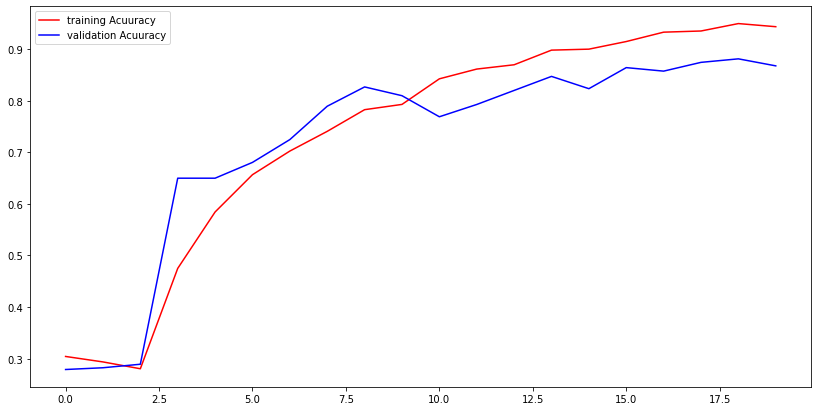

In [15]:
model.save('brain_tumor_h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='training Acuuracy')
plt.plot(epochs,val_acc,'b',label='validation Acuuracy')
plt.legend(loc='upper left')
plt.show()


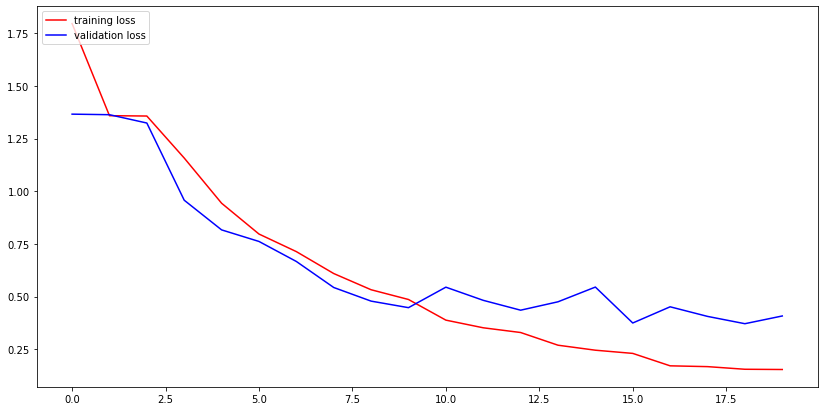

In [16]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend(loc='upper left')
plt.show()

In [17]:

#prediction
img=cv2.imread('../input/brain-tumor-classification-mri/Testing/glioma_tumor/image(15).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape


(150, 150, 3)

In [18]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

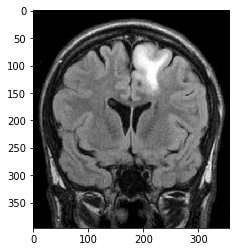

In [19]:
from tensorflow.keras.preprocessing import image
img=image.load_img('../input/brain-tumor-classification-mri/Testing/glioma_tumor/image(15).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [20]:
a=model.predict(img_array)
indices=a.argmax()
indices

0

Text(0.5, 1.0, 'glioma_tumor')

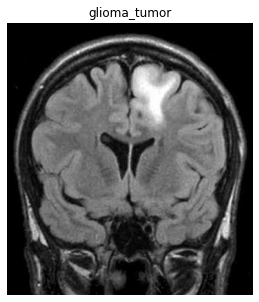

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(img)   
plt.axis('off')
plt.title(getcode(np.argmax(a)))